In [1]:
library(GSVA)
library(GSEABase)
library(Biobase)
library(genefilter)
library(limma)
library(RColorBrewer)
library(msigdbr)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: annotate

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: IRanges


In [1]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.23.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_1.0.6     crayon_1.5.2    digest_0.6.34   utf8_1.2.4     
 [5] IRdisplay_1.1   repr_1.1.6      lifecycle_1.0.4 jsonlite_1.8.8 
 [9] evaluate_0.23   pillar_1.9.0    rlang_1.1.3     cli_3.6.2      
[13] uuid_1.2-0      vctrs_0.6.5     IRkernel_1.3.2  tools_4.2.3    
[17] glue_1.7.0      fastmap_1.1.1 

In [3]:
packageVersion("GSVA")

[1] ‘1.46.0’

In [2]:
library(GSVA)

#######clustering for CB and NCB in Ever
EverData <- read.csv("../leave_one_out/Expression_log2_21_primaryEver_braun_2020.csv",row.names = 1);
dnames = names(EverData)
EverData <- t(EverData)
EverData <- t(EverData)
names(EverData) <- dnames
dim(EverData)

cgp_gene_sets = msigdbr(species = "human", category = "H")#,subcategory = "GO:CC")
msigdbr_list = split(x = cgp_gene_sets$gene_symbol, f = cgp_gene_sets$gs_name) #ensembl_gene
names(msigdbr_list) <- paste0("p", 1:length(msigdbr_list))
head(msigdbr_list)
#mx.diff=FALSE es值是一个双峰的分布
es.max <- gsva(EverData, msigdbr_list, mx.diff=FALSE, verbose=FALSE, parallel.sz=1,min.sz=5)
#mx.diff=TURE es值是一个近似正态分布
es.dif <- gsva(EverData, msigdbr_list, mx.diff=TRUE, verbose=FALSE, parallel.sz=1,min.sz=5)

pheatmap::pheatmap(es.max)

In [20]:
cate = "metaNivo"
file_name <- sprintf("../leave_one_out/Expression_log2_21_%s_braun_2020.csv", cate)

file_read = read.csv(file_name,row.names = 1);
file_read <- t(file_read)
head(file_read)

,EA632171,P66507-10D-Run1_S4_L001,P66507-09C-Run1_S26_L002,EA647814,P66451-06C-Run1_S12_L001,P66511-10D-Run1_S3_L001,EA595632,EA632174,P66451-08H-Run1_S26_L002,EA632149,⋯,RCC_18_T_SCR,RCC_21_T_SCR,RCC_27_T_SCR,RCC_41_T_SCR,RCC_50_T_SCR,RCC_73_T_SCR,RCC_90_T_SCR,RCC_93_T_SCR,RCC_96_T_SCR,RCC_99_T_SCR
A1BG,28.37732,31.61981,30.73292,28.55874,32.54806,30.06060,31.91714,31.86824,30.96550,31.78431,⋯,35.14732,27.11868,27.11868,29.45036,31.07951,30.95441,33.11015,32.88028,30.65871,27.11868
A1BG.AS1,24.99055,28.76690,29.43288,22.42612,24.76009,25.12303,27.80082,27.58759,23.85963,28.77375,⋯,26.21497,22.68825,26.75524,26.45758,25.42523,27.31088,26.79320,25.65984,27.53389,17.78873
A1CF,32.09307,32.29538,26.67674,31.95006,31.24266,33.96711,27.81641,27.20219,32.94978,31.26858,⋯,35.97876,31.04351,28.76771,34.15412,26.16157,26.16157,26.16157,31.82294,32.93051,33.12870
A2M,36.93038,37.67324,39.04103,38.23606,37.97332,37.07991,36.24338,38.77433,37.52134,37.68294,⋯,38.80427,37.21673,37.91778,37.68259,38.05934,38.37618,36.53739,38.26587,36.88209,35.62672
A2M.AS1,25.55068,25.42081,24.44813,26.30127,24.08136,26.75675,26.64061,25.21405,27.41797,24.33818,⋯,20.65485,24.39566,26.43576,26.57732,20.65485,25.97182,26.38826,26.50431,26.30315,20.65485
A2ML1,19.46608,20.86017,25.11171,33.84682,20.86017,24.59552,26.14347,25.27161,24.84526,28.13307,⋯,32.64621,24.43832,24.43832,24.43832,24.43832,24.43832,24.43832,24.43832,24.43832,24.43832


In [21]:
cgp_gene_sets = msigdbr(species = "human", category = "C2",subcategory="KEGG")#,subcategory = "GO:CC")
msigdbr_list = split(x = cgp_gene_sets$gene_symbol, f = cgp_gene_sets$gs_name)
head(msigdbr_list) 

$KEGG_ABC_TRANSPORTERS
 [1] "ABCA1"  "ABCA10" "ABCA12" "ABCA13" "ABCA2"  "ABCA3"  "ABCA4"  "ABCA5" 
 [9] "ABCA6"  "ABCA7"  "ABCA8"  "ABCA9"  "ABCB1"  "ABCB10" "ABCB11" "ABCB11"
[17] "ABCB4"  "ABCB5"  "ABCB6"  "ABCB7"  "ABCB8"  "ABCB9"  "ABCC1"  "ABCC1" 
[25] "ABCC10" "ABCC11" "ABCC12" "ABCC2"  "ABCC3"  "ABCC4"  "ABCC5"  "ABCC6" 
[33] "ABCC6"  "ABCC8"  "ABCC9"  "ABCD1"  "ABCD2"  "ABCD3"  "ABCD4"  "ABCG1" 
[41] "ABCG2"  "ABCG4"  "ABCG5"  "ABCG8"  "CFTR"   "TAP1"   "TAP1"   "TAP1"  
[49] "TAP1"   "TAP1"   "TAP1"   "TAP1"   "TAP1"   "TAP2"   "TAP2"   "TAP2"  
[57] "TAP2"   "TAP2"   "TAP2"   "TAP2"   "TAP2"  

$KEGG_ACUTE_MYELOID_LEUKEMIA
 [1] "AKT1"     "AKT2"     "AKT3"     "AKT3"     "ARAF"     "BAD"     
 [7] "BRAF"     "CCNA1"    "CCND1"    "CEBPA"    "CHUK"     "EIF4EBP1"
[13] "FLT3"     "GRB2"     "HRAS"     "HRAS"     "IKBKB"    "IKBKG"   
[19] "JUP"      "KIT"      "KRAS"     "LEF1"     "MAP2K1"   "MAP2K2"  
[25] "MAPK1"    "MAPK3"    "MTOR"     "MYC"      "NFKB1"    "NRAS"    
[31] "PIK3CA"   "PIK3CB"   "PIK3CD"   "PIK3CG"   "PIK3R1"   "PIK3R2"  
[37] "PIK3R3"   "PIK3R5"   "PIM1"     "PIM2"     "PML"      "PPARD"   
[43] "RAF1"     "RARA"     "RELA"     "RPS6KB1"  "RPS6KB2"  "RUNX1"   
[49] "RUNX1T1"  "SOS1"     "SOS2"     "SPI1"     "STAT3"    "STAT5A"  
[55] "STAT5B"   "TCF7"     "TCF7L1"   "TCF7L2"   "ZBTB16"  

$KEGG_ADHERENS_JUNCTION
 [1] "ACP1"    "ACTB"    "ACTG1"   "ACTN1"   "ACTN2"   "ACTN3"   "ACTN4"  
 [8] "ACTN4"   "AFDN"    "BAIAP2"  "CDC42"   "CDH1"    "CREBBP"  "CSNK2A1"
[15] "CSNK2A2" "CSNK2B"  "CSNK2B"  "CSNK2B"  "CSNK2B"  "CSNK2B"  "CSNK2B" 
[22] "CSNK2B"  "CSNK2B"  "CTNNA1"  "CTNNA2"  "CTNNA3"  "CTNNB1"  "CTNND1" 
[29] "EGFR"    "EP300"   "ERBB2"   "FARP2"   "FER"     "FGFR1"   "FYN"    
[36] "IGF1R"   "INSR"    "IQGAP1"  "LEF1"    "LMO7"    "MAP3K7"  "MAPK1"  
[43] "MAPK3"   "MET"     "NECTIN1" "NECTIN2" "NECTIN3" "NECTIN4" "NLK"    
[50] "PARD3"   "PTPN1"   "PTPN6"   "PTPRB"   "PTPRF"   "PTPRJ"   "PTPRM"  
[57] "RAC1"    "RAC2"    "RAC3"    "RHOA"    "SMAD2"   "SMAD3"   "SMAD4"  
[64] "SNAI1"   "SNAI2"   "SORBS1"  "SRC"     "SSX2IP"  "TCF7"    "TCF7L1" 
[71] "TCF7L2"  "TGFBR1"  "TGFBR2"  "TJP1"    "TJP1"    "VCL"     "WAS"    
[78] "WASF1"   "WASF2"   "WASF3"   "WASL"    "YES1"   

$KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY
 [1] "ACACB"    "ACSL1"    "ACSL3"    "ACSL4"    "ACSL5"    "ACSL6"   
 [7] "ADIPOQ"   "ADIPOR1"  "ADIPOR2"  "ADIPOR2"  "AGRP"     "AKT1"    
[13] "AKT2"     "AKT3"     "AKT3"     "CAMKK1"   "CAMKK2"   "CD36"    
[19] "CHUK"     "CPT1A"    "CPT1B"    "CPT1C"    "G6PC1"    "G6PC2"   
[25] "G6PC2"    "IKBKB"    "IKBKG"    "IRS1"     "IRS2"     "IRS4"    
[31] "JAK2"     "LEP"      "LEPR"     "MAPK10"   "MAPK8"    "MAPK9"   
[37] "MTOR"     "NFKB1"    "NFKBIA"   "NFKBIB"   "NFKBIB"   "NFKBIE"  
[43] "NPY"      "PCK1"     "PCK2"     "PCK2"     "POMC"     "PPARA"   
[49] "PPARGC1A" "PRKAA1"   "PRKAA2"   "PRKAB1"   "PRKAB2"   "PRKAG1"  
[55] "PRKAG2"   "PRKAG3"   "PRKCQ"    "PTPN11"   "RELA"     "RXRA"    
[61] "RXRB"     "RXRB"     "RXRB"     "RXRB"     "RXRB"     "RXRB"    
[67] "RXRG"     "SLC2A1"   "SLC2A4"   "SLC2A4"   "SOCS3"    "STAT3"   
[73] "STK11"    "TNF"      "TNF"      "TNF"      "TNF"      "TNF"     
[79] "TNF"      "TNF"      "TNF"      "TNFRSF1A" "TNFRSF1B" "TRADD"   
[85] "TRAF2"   

$KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM
 [1] "ABAT"    "ACY3"    "ADSL"    "ADSS1"   "ADSS2"   "AGXT"    "AGXT2"  
 [8] "ALDH4A1" "ALDH5A1" "ASL"     "ASNS"    "ASPA"    "ASS1"    "CAD"    
[15] "CPS1"    "DDO"     "GAD1"    "GAD2"    "GFPT1"   "GFPT2"   "GLS"    
[22] "GLS2"    "GLUD1"   "GLUD2"   "GLUD2"   "GLUL"    "GOT1"    "GOT2"   
[29] "GPT"     "GPT2"    "IL4I1"   "NIT2"    "PPAT"   

$KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION
 [1] "ATP1A1"   "ATP1A2"   "ATP1A3"   "ATP1A4"   "ATP1B1"   "ATP1B2"  
 [7] "ATP1B3"   "ATP1B4"   "FXYD2"    "FXYD4"    "HSD11B1"  "HSD11B2" 
[13] "IGF1"     "INS"      "INSR"     "IRS1"     "IRS2"     "IRS4"    
[19] "KCNJ1"    "KRAS"     "MAPK1"    

In [22]:
# 前者是高斯分布 kcdf=Gaussian (suitable for FPKM)，后者是二项式分布 kcdf=Poisson (suitable for RNA-seq alignment count)
#names(msigdbr_list) <- paste0("p", 1:length(msigdbr_list))
#mx.diff=FALSE es值是一个双峰的分布 
#method: plage, zscore, ssgsea, gsva
es.max <- gsva(file_read, method = "gsva"
               ,msigdbr_list, mx.diff=TRUE, verbose=FALSE, parallel.sz=1,min.sz=5)

#mx.diff=TURE es值是一个近似正态分布
#es.dif <- gsva(primNivoData, msigdbr_list, mx.diff=TRUE, verbose=FALSE, parallel.sz=1,min.sz=5)

write.table(es.max, 
            file = sprintf("gsva1_c2kegg_pathway_%s.txt", cate), sep = "\t",
            row.names = TRUE, col.names = TRUE)

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”


In [23]:
packageVersion("matrixStats")

[1] ‘1.1.0’

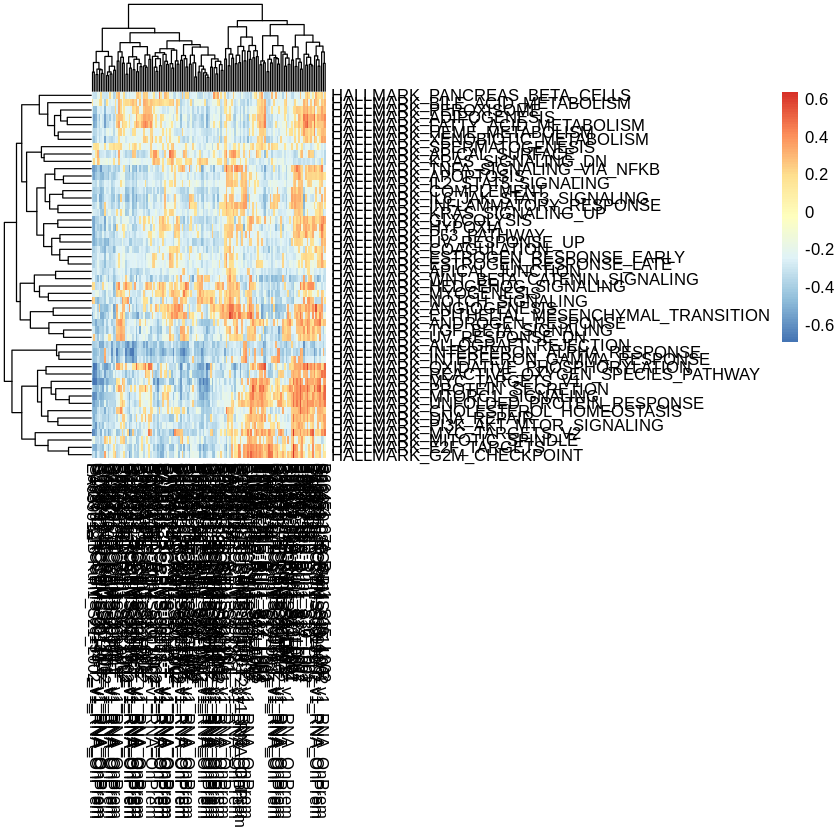

In [7]:
pheatmap::pheatmap(es.max)
#pheatmap::pheatmap(es.dif)